In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [2]:
h = 0.01
lx, ly = np.pi, np.pi
nx, ny = int(np.round(lx/h)), int(np.round(ly/h))
hx, hy = lx/nx, ly/ny
x = np.linspace(0.5*hx, lx-0.5*hx, nx)
y = np.linspace(0.5*hy, ly-0.5*hy, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

In [3]:
def exact(x, y):
    return np.exp(-np.cos(2*x))*np.sin(2*y)

def RHS(X, Y):
    return np.exp(-np.cos(2*X))*np.sin(2*Y)*(2*np.cos(2*X)-1)**2

def OpL_D(u, hx, hy):
    res = np.zeros_like(u)
    res[1:, :] += -u[:-1, :]/hx**2
    res[:-1, :] += -u[1:, :]/hx**2
    res[:, 1:] += -u[:, :-1]/hy**2
    res[:, :-1] += -u[:, 1:]/hy**2
    res[0, :] += -u[-1, :]/hx**2
    res[-1, :] += -u[0, :]/hx**2
    res[:, 0] += -u[:, -1]/hy**2
    res[:, -1] += -u[:, 0]/hy**2
    return res

def D(hx, hy):
    res = np.zeros_like(X)
    res += 2/hx**2
    res += 2/hy**2
    res += 1
    return res

In [4]:
u = np.zeros_like(X)
u1 = u+1e-5
d = D(hx, hy)
F = RHS(X, Y)
while np.max(np.abs(u-u1)) > 1e-10:
    u1 = u.copy()
    u = 1/d*(F-OpL_D(u, hx, hy))

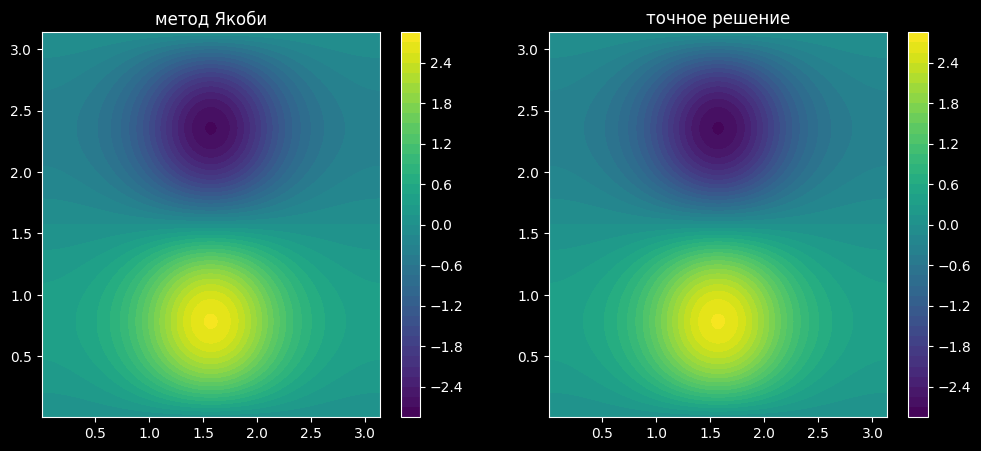

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax0 = ax[0].contourf(X, Y, u, levels=50)
ax[0].set_title('метод Якоби')
ax1 = ax[1].contourf(X, Y, exact(X, Y), levels=50)
ax[1].set_title('точное решение')
fig.colorbar(ax0)
fig.colorbar(ax1);

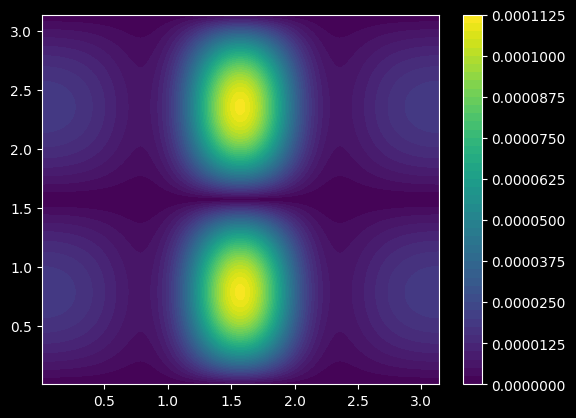

In [6]:
fig = plt.figure()
plot = plt.contourf(X, Y, np.abs(u-exact(X, Y)), levels=50)
fig.colorbar(plot);